In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize

In [2]:
data1 = np.loadtxt(os.path.join('DATASETRAW.csv'), delimiter=",")
data1 = pd.DataFrame(data1,columns=['marca','modelo','puertas','asientos','Estadoauto','tipo','transmicion','combustible','kilometraje','color','procedencia','cilindrada','EstadoPintura','Condicion2','Accidentes?','accesorios','precio'])
data1

,marca,modelo,puertas,asientos,Estadoauto,tipo,transmicion,combustible,kilometraje,color,procedencia,cilindrada,EstadoPintura,Condicion2,Accidentes?,accesorios,precio
0,12.0,2017.0,5.0,5.0,3.0,2.0,1.0,1.0,42397.0,4.0,4.0,1200.0,1.0,1.0,2.0,2.0,27000.0
1,12.0,2013.0,4.0,5.0,2.0,2.0,1.0,1.0,60.0,14.0,3.0,3500.0,1.0,1.0,2.0,2.0,21500.0
2,19.0,2019.0,5.0,12.0,2.0,4.0,1.0,1.0,0.0,7.0,3.0,3700.0,1.0,1.0,2.0,2.0,37800.0
3,30.0,2020.0,2.0,3.0,2.0,1.0,1.0,3.0,850.0,14.0,4.0,800.0,1.0,1.0,2.0,2.0,3900.0
4,10.0,2001.0,5.0,5.0,3.0,2.0,1.0,1.0,24900.0,10.0,4.0,3000.0,1.0,1.0,2.0,2.0,10500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,12.0,1997.0,3.0,4.0,3.0,3.0,2.0,2.0,183000.0,7.0,2.0,4200.0,1.0,1.0,2.0,1.0,13800.0
931,26.0,2009.0,5.0,4.0,3.0,2.0,1.0,1.0,200000.0,14.0,2.0,2400.0,2.0,1.0,2.0,1.0,13000.0
932,17.0,1992.0,5.0,4.0,3.0,1.0,2.0,1.0,300.0,7.0,3.0,1600.0,2.0,1.0,2.0,2.0,5000.0
933,13.0,2012.0,5.0,4.0,2.0,2.0,1.0,1.0,90000.0,7.0,2.0,2967.0,2.0,1.0,2.0,2.0,24900.0


In [3]:
borrado=data1[data1["cilindrada"]>=7000].index
dataM=data1.drop(borrado)

In [4]:
dataM.describe()

,marca,modelo,puertas,asientos,Estadoauto,tipo,transmicion,combustible,kilometraje,color,procedencia,cilindrada,EstadoPintura,Condicion2,Accidentes?,accesorios,precio
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,9.310000e+02,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,15.809882,2011.828142,4.305048,4.631579,2.475832,1.670247,1.409237,1.027927,7.520896e+04,7.197637,3.352309,2349.277121,1.114930,1.076262,1.889366,1.230934,21560.284640
std,10.956186,8.149444,0.889222,0.966443,0.715576,0.778588,0.491957,0.183379,4.532498e+05,4.711189,1.069842,1026.860168,0.319109,0.265560,0.313847,0.421657,13375.723471
min,1.000000,1895.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000
25%,8.000000,2010.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.445000e+04,3.000000,3.000000,1600.000000,1.000000,1.000000,2.000000,1.000000,13200.000000
50%,12.000000,2013.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,4.500000e+04,7.000000,3.000000,2000.000000,1.000000,1.000000,2.000000,1.000000,18500.000000
75%,26.000000,2016.000000,5.000000,5.000000,3.000000,2.000000,2.000000,1.000000,8.300000e+04,12.000000,4.000000,3000.000000,1.000000,1.000000,2.000000,1.000000,26000.000000
max,40.000000,2022.000000,5.000000,12.000000,4.000000,4.000000,2.000000,3.000000,1.364597e+07,14.000000,8.000000,6578.000000,2.000000,2.000000,2.000000,2.000000,99900.000000


In [5]:
borrado=dataM[dataM["cilindrada"]<=700].index
dataM=dataM.drop(borrado)

In [6]:
borrado=dataM[dataM["precio"]<=5000].index
dataM=dataM.drop(borrado)

In [7]:
borrado=dataM[dataM["precio"]>=70000].index
dataM=dataM.drop(borrado)

In [8]:
dataM

,marca,modelo,puertas,asientos,Estadoauto,tipo,transmicion,combustible,kilometraje,color,procedencia,cilindrada,EstadoPintura,Condicion2,Accidentes?,accesorios,precio
0,12.0,2017.0,5.0,5.0,3.0,2.0,1.0,1.0,42397.0,4.0,4.0,1200.0,1.0,1.0,2.0,2.0,27000.0
1,12.0,2013.0,4.0,5.0,2.0,2.0,1.0,1.0,60.0,14.0,3.0,3500.0,1.0,1.0,2.0,2.0,21500.0
2,19.0,2019.0,5.0,12.0,2.0,4.0,1.0,1.0,0.0,7.0,3.0,3700.0,1.0,1.0,2.0,2.0,37800.0
4,10.0,2001.0,5.0,5.0,3.0,2.0,1.0,1.0,24900.0,10.0,4.0,3000.0,1.0,1.0,2.0,2.0,10500.0
5,17.0,2016.0,4.0,4.0,3.0,1.0,1.0,1.0,30000.0,10.0,3.0,2000.0,1.0,1.0,2.0,2.0,23000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,19.0,2000.0,5.0,4.0,3.0,1.0,1.0,1.0,132727.0,14.0,4.0,5000.0,2.0,1.0,2.0,2.0,7500.0
930,12.0,1997.0,3.0,4.0,3.0,3.0,2.0,2.0,183000.0,7.0,2.0,4200.0,1.0,1.0,2.0,1.0,13800.0
931,26.0,2009.0,5.0,4.0,3.0,2.0,1.0,1.0,200000.0,14.0,2.0,2400.0,2.0,1.0,2.0,1.0,13000.0
933,13.0,2012.0,5.0,4.0,2.0,2.0,1.0,1.0,90000.0,7.0,2.0,2967.0,2.0,1.0,2.0,2.0,24900.0


In [9]:
dataM.describe()

,marca,modelo,puertas,asientos,Estadoauto,tipo,transmicion,combustible,kilometraje,color,procedencia,cilindrada,EstadoPintura,Condicion2,Accidentes?,accesorios,precio
count,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,8.940000e+02,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,15.723714,2012.097315,4.316555,4.629754,2.470917,1.685682,1.407159,1.021253,7.599042e+04,7.090604,3.350112,2370.856823,1.106264,1.073826,1.893736,1.225951,21058.958613
std,10.876933,7.642087,0.874816,0.967818,0.707300,0.783849,0.491580,0.151869,4.623330e+05,4.710625,1.078869,994.708244,0.308348,0.261633,0.308348,0.418441,11358.937089
min,1.000000,1895.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,800.000000,1.000000,1.000000,1.000000,1.000000,5500.000000
25%,8.000000,2010.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.517600e+04,3.000000,3.000000,1600.000000,1.000000,1.000000,2.000000,1.000000,13500.000000
50%,12.000000,2013.000000,5.000000,5.000000,3.000000,2.000000,1.000000,1.000000,4.500000e+04,7.000000,3.000000,2000.000000,1.000000,1.000000,2.000000,1.000000,18500.000000
75%,26.000000,2016.000000,5.000000,5.000000,3.000000,2.000000,2.000000,1.000000,8.300000e+04,11.000000,4.000000,2999.000000,1.000000,1.000000,2.000000,1.000000,25800.000000
max,40.000000,2022.000000,5.000000,12.000000,4.000000,4.000000,2.000000,3.000000,1.364597e+07,14.000000,8.000000,6578.000000,2.000000,2.000000,2.000000,2.000000,69500.000000


In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm

In [11]:
data1 = np.array(dataM)
x = data1[0:800, 0:16]
y = data1[:800, 16]
m =y.size
print(x.shape)
print(y.shape)

(800, 16)
(800,)


In [12]:
x = np.concatenate([np.ones((m, 1)), x], axis=1)

In [13]:
x_original = data1[:900,:16]
array_norm = featureNormalize(data1)
y = array_norm[:900,16]
x = featureNormalize(x_original)
x_original = np.c_[np.ones(len(x)), x_original]
x = np.c_[np.ones(len(x)), x]

In [14]:
x

array([[ 1.        , -0.34254122,  0.6418965 , ..., -0.28232985,
         0.3448168 ,  1.85087616],
       [ 1.        , -0.34254122,  0.11818628, ..., -0.28232985,
         0.3448168 ,  1.85087616],
       [ 1.        ,  0.30138277,  0.9037516 , ..., -0.28232985,
         0.3448168 ,  1.85087616],
       ...,
       [ 1.        ,  0.94530675, -0.40552393, ..., -0.28232985,
         0.3448168 , -0.54028466],
       [ 1.        , -0.25055208, -0.01274127, ..., -0.28232985,
         0.3448168 ,  1.85087616],
       [ 1.        , -1.07845435,  1.03467916, ..., -0.28232985,
         0.3448168 , -0.54028466]])

In [15]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.11167103e-16 -1.12918180e-01  2.69567575e-01  4.48849925e-02
  6.35780132e-02 -2.16208305e-01  9.78501958e-02 -6.12405551e-02
  1.38484767e-02 -6.70571228e-02 -7.57644230e-03  2.96862371e-03
  3.67613014e-01 -6.10083166e-03 -3.53654594e-02  5.53371936e-02
 -7.63647008e-02]


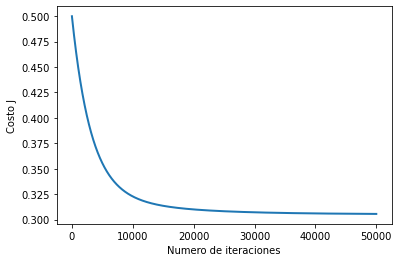

In [17]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 50000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(17)
theta, J_history = gradientDescentMulti(x, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [18]:
J_history[-1]

0.3055572497245928

In [19]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [20]:
x_test ,y_test = data1[800:,0:16],data1[800:,16]

In [21]:
def evaluar(x, y, theta):
  m = y.size
  contenedor = 0
  for i in range (m):
    price= np.dot(x[i],theta)
    paso1 = (y[i] - price) * 100
    paso2 = abs(paso1 / y[i])
    contenedor = (contenedor*1)+ paso2
  return contenedor 

In [22]:
def presicion(x, y ,theta):
  m = y.size
  datos = evaluar(x, y, theta)
  presicion = datos / m
  porcentaje = 100 - presicion
  print(porcentaje)
  return porcentaje

In [23]:
y_original = data1[:900,16]
thetaNormal = normalEqn(x_original,y_original)
print(thetaNormal)

[-8.37332400e+05 -1.12698079e+02  4.22695189e+02  6.30127559e+02
  7.61855614e+02 -3.50039724e+03  1.08384619e+03 -1.10549921e+03
  1.08300803e+03 -1.80551410e-03 -1.82193741e+01  3.18764616e+01
  4.57427202e+00 -1.17872520e+02 -1.24409844e+03  2.03493580e+03
 -1.94830278e+03]


In [24]:
X_array = [1, 13.0,	2012.0,	5.0,	4.0,	2.0,	2.0,	1.0,	1.0,	90000.0,	7.0,	2.0,	2967.0,	2.0,	1.0,	2.0,	2.0]
price= np.dot(X_array,thetaNormal)

print('Precio predecido para un automovil (usando la ecuación de la normal): {:.0f}$'.format(price))
print("Precio original >>>>>>>>>>> 24900$")

Precio predecido para un automovil (usando la ecuación de la normal): 25047$
Precio original >>>>>>>>>>> 24900$


In [25]:
X_array2 = [1, 19.0,	2005.0,	4.0,	4.0,	3.0,	1.0,	2.0,	1.0,	108000.0,	14.0,	2.0,	1600.0,	2.0,	1.0,	2.0,	2.0]
price= np.dot(X_array2,thetaNormal)

print('Precio predecido para un automovil (usando la ecuación de la normal): {:.0f}$'.format(price))
print("Precio original >>>>>>>>>>> 7000$")

Precio predecido para un automovil (usando la ecuación de la normal): 8679$
Precio original >>>>>>>>>>> 7000$


In [26]:
X_array3 = [1, 26.0,	2009.0,	5.0,	4.0,	3.0,	2.0,	1.0,	1.0,	200000.0,	14.0,	2.0,	2400.0,	2.0,	1.0,	2.0,	2.0]
price= np.dot(X_array3,thetaNormal)

print('Precio predecido para un automovil (usando la ecuación de la normal): {:.0f}$'.format(price))
print("Precio original >>>>>>>>>>> 13000$")

Precio predecido para un automovil (usando la ecuación de la normal): 15893$
Precio original >>>>>>>>>>> 13000$


In [27]:
x_test = np.c_[np.ones(len(x_test)), x_test]

In [28]:
presicion = presicion(x_test ,y_test,thetaNormal) 

70.67552435734966
